In [1]:
import hashlib
import PIL
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
import numpy as np

def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

import os
for i in range(4):
    os.getcwd()
    if i==0:
        os.chdir(r'C:\Users\anand\Autism\data\train\Autistic')
        os.getcwd()
    elif i==1:
        os.chdir(r'C:\Users\anand\Autism\data\train\Non_Autistic')
        os.getcwd()
    elif i==2:
        os.chdir(r'C:\Users\anand\Autism\data\test\Autistic')
        os.getcwd()
    else:
        os.chdir(r'C:\Users\anand\Autism\data\test\Non_Autistic')
        os.getcwd()

    file_list = os.listdir()
    print(len(file_list))

    import hashlib, os
    duplicates = []
    hash_keys = dict()
    for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
        if os.path.isfile(filename):
            with open(filename, 'rb') as f:
                filehash = hashlib.md5(f.read()).hexdigest()
            if filehash not in hash_keys:
                hash_keys[filehash] = index
            else:
                duplicates.append((index,hash_keys[filehash]))

    print("Duplicates:", len(duplicates))

    for index in duplicates:
        os.remove(file_list[index[0]])

1325
Duplicates: 0
1326
Duplicates: 0
140
Duplicates: 0
142
Duplicates: 0


Found 2651 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


C:\Users\anand\AppData\Local\Temp\ipykernel_1584\2123879748.py:87: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = finetune_model.fit_generator(train_generator, epochs=NUM_EPOCHS, workers=8,


Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 87.9769 - accuracy: 0.5312
Epoch 1: saving model to ResNet_model_weights.h5


C:\Users\anand\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 160s 13s/step - loss: 87.9769 - accuracy: 0.5312 - val_loss: 69.5861 - val_accuracy: 0.5036
Epoch 2/10
12/12 [==============================] - ETA: 0s - loss: 128.7990 - accuracy: 0.5104
Epoch 2: saving model to ResNet_model_weights.h5
12/12 [==============================] - 128s 11s/step - loss: 128.7990 - accuracy: 0.5104 - val_loss: 123.9372 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - ETA: 0s - loss: 111.2319 - accuracy: 0.4688
Epoch 3: saving model to ResNet_model_weights.h5
12/12 [==============================] - 115s 10s/step - loss: 111.2319 - accuracy: 0.4688 - val_loss: 12.2935 - val_accuracy: 0.7250
Epoch 4/10
12/12 [==============================] - ETA: 0s - loss: 58.0867 - accuracy: 0.6042
Epoch 4: saving model to ResNet_model_weights.h5
12/12 [==============================] - 113s 10s/step - loss: 58.0867 - accuracy: 0.6042 - val_loss: 33.1383 - val_accuracy: 0.5464
Epoch 5/10
12/12 [=============

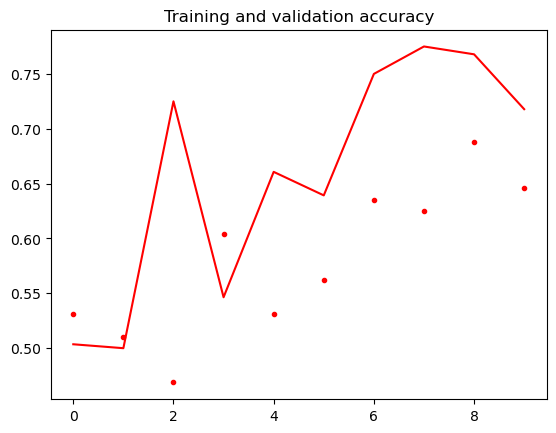

<Figure size 640x480 with 0 Axes>

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

HEIGHT = 300
WIDTH = 300

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, 3))

TRAIN_DIR = r'C:\Users\anand\Autism\data\train'
HEIGHT = 300
WIDTH = 300
BATCH_SIZE = 8

train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(HEIGHT, WIDTH),
                                                    batch_size=BATCH_SIZE)

test_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

test_generator = test_datagen.flow_from_directory(
    'C:/Users/anand/Autism/data/test',
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE
    )

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x)

    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model

class_list = ["A", "NA"]
FC_LAYERS = [1024, 1024]
dropout = 0.5

finetune_model = build_finetune_model(base_model,
                                      dropout=dropout,
                                      fc_layers=FC_LAYERS,
                                      num_classes=len(class_list))

from tensorflow.keras.optimizers import SGD, Adam
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

NUM_EPOCHS = 10
BATCH_SIZE = 8
#num_train_images = 2654
num_train_images = 100

adam = Adam(lr=0.00001)
finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

filepath="ResNet" + "_model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor=["acc"], verbose=1, mode='max')
#early_stopping = EarlyStopping(monitor='val_accuracy',  patience=3, restore_best_weights=True)

#callbacks_list = [early_stopping]
callbacks_list = [checkpoint]

history = finetune_model.fit_generator(train_generator, epochs=NUM_EPOCHS, workers=8,
                                       steps_per_epoch=num_train_images // BATCH_SIZE,
                                       shuffle=True, callbacks=callbacks_list, validation_data=test_generator)

# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()

    plt.savefig('acc_vs_epochs.png')
    
plot_training(history)

In [1]:
import cv2
import numpy as np
import os
#from keras.preprocessing import image
#from keras import Input
from sklearn.model_selection import train_test_split

In [2]:
from PIL import Image
SIZE = 300
dataset = []
label = []
Autistic_images = os.listdir("C:/Users/anand/Autism/data/test/Autistic/")
for image_name in (Autistic_images):
    image = cv2.imread("C:/Users/anand/Autism/data/test/Autistic/"+image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(0)

In [3]:
Nonautistic_images = os.listdir("C:/Users/anand/Autism/data/test/Non_Autistic/")
for image_name in Nonautistic_images:
    image = cv2.imread("C:/Users/anand/Autism/data/test/Non_Autistic/"+image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(1)

In [4]:
from tensorflow.keras.utils import to_categorical
dataset = np.array(dataset)
label = to_categorical(np.array(label))
print(dataset.shape, label.shape)

C:\Users\anand\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(280, 300, 300, 3) (280, 2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted label: Autistic
Actual label: Autistic


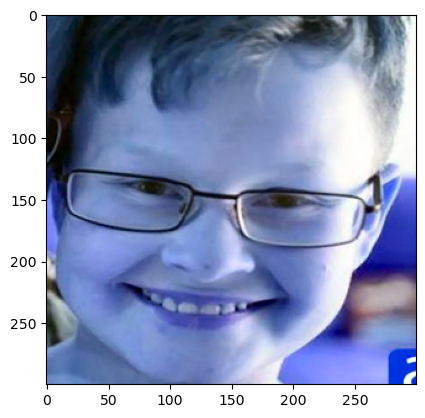

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
newmodel_path ='C:/users/anand/Onedrive/Desktop/ResNet_model_weights.h5'
finetune_model = load_model(newmodel_path)
img_num = 87
img = dataset[img_num]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
prediction = np.array(finetune_model.predict(input_img))
predicted_class = np.argmax(prediction)
class_labels = ['Autistic','Non-Autistic']
actual_class = np.argmax(label[img_num])
pre_class = class_labels[predicted_class]
ac_class = class_labels[actual_class]
print("Predicted label:",pre_class)
print("Actual label:",ac_class)

In [6]:
pred = finetune_model.predict(dataset)
for i in range(len(pred)):
    arg_max_val = np.argmax(pred[i])
    pred[i] = 0
    pred[i][arg_max_val] = 1

9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step


[[ 83  57]
 [  7 133]]


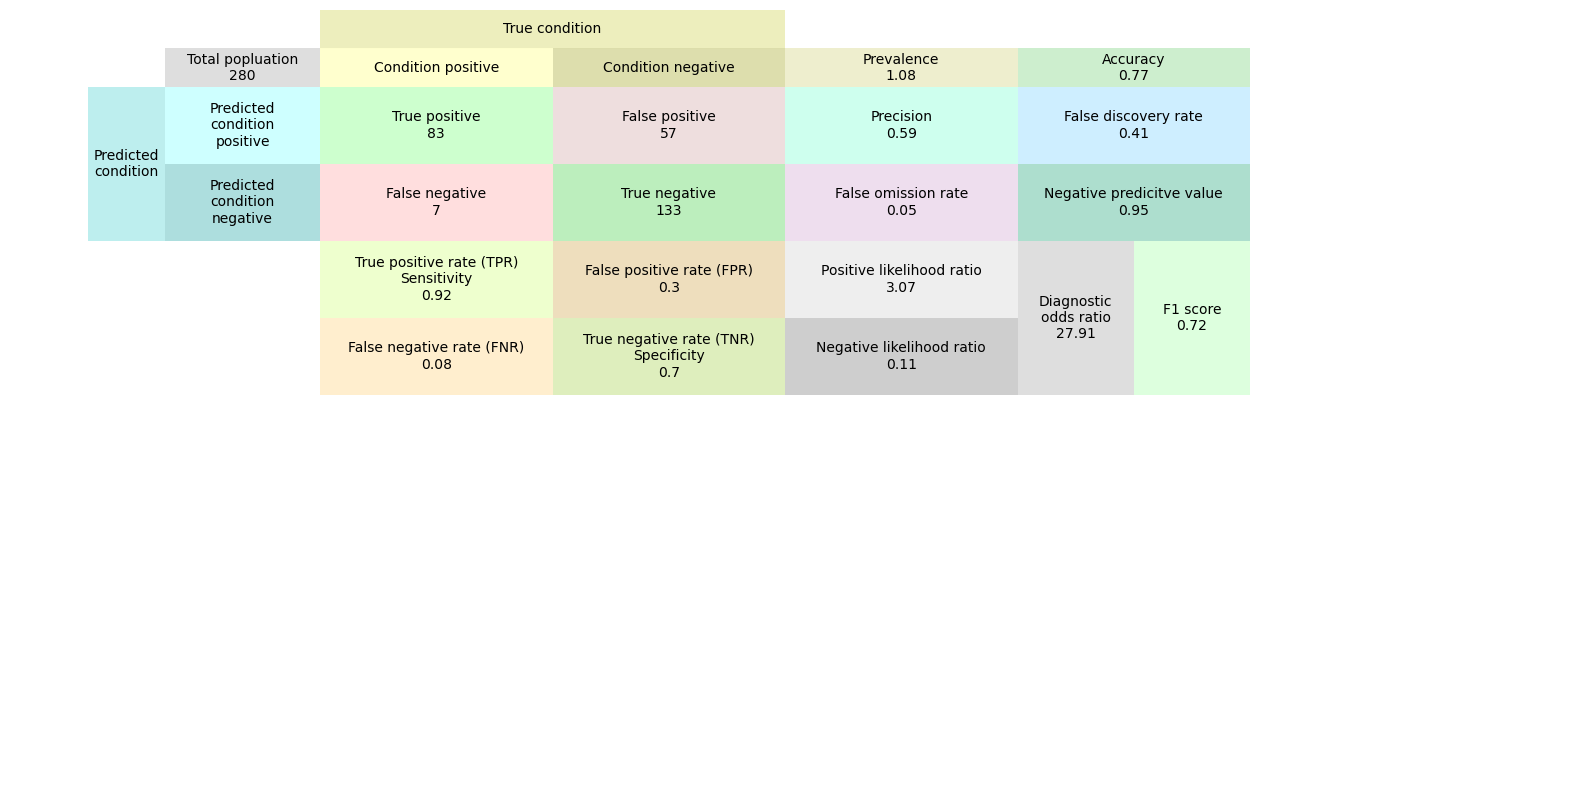

In [7]:
import keras
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

cm = confusion_matrix(label.argmax(axis=1), pred.argmax(axis=1))
matrix = np.array(cm)
print(matrix)

TPop = matrix.sum()
TP = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TN = matrix[1][1]
CP = TP + FN
CN = FP + TN
PCP = TP + FP
PCN = FN + TN
TPR = round(TP/CP,2)
FNR = round(FN/CP,2)
FPR = round(FP/CN,2)
TNR = round(TN/CN,2)
prevalence = round(CP/TP,2)
PPV = round(TP/PCP,2)
FOR = round(FN/PCN,2)
PLR = round(TPR/FPR,2)
NLR = round(FNR/TNR,2)
ACC = round((TP + TN) / TPop,2)
FDR = round(FP/PCP,2)
NPV = round(TN/PCN,2)
DOR = round(PLR/NLR,2)
F1 = round(2 * ((PPV * TPR)/(PPV + TPR)),2)

alpha = 0.8

strings = []
strings.append('Predicted\ncondition')
strings.append('Total popluation\n'+ str(TPop))
strings.append('Predicted\ncondition\npositive')
strings.append('Predicted\ncondition\nnegative')

strings.append('True condition')
strings.append('Condition positive')
strings.append('True positive\n'+ str(TP))
strings.append('False negative\n'+ str(FN))
strings.append('True positive rate (TPR)\nSensitivity\n'+ str(TPR))
strings.append('False negative rate (FNR)\n'+ str(FNR))

strings.append('Condition negative')
strings.append('False positive\n'+ str(FP))
strings.append('True negative\n'+ str(TN))
strings.append('False positive rate (FPR)\n'+ str(FPR))
strings.append('True negative rate (TNR)\nSpecificity\n'+ str(TNR))

strings.append('Prevalence\n'+ str(prevalence))
strings.append('Precision\n'+ str(PPV))
strings.append('False omission rate\n'+ str(FOR))
strings.append('Positive likelihood ratio\n'+ str(PLR))
strings.append('Negative likelihood ratio\n'+ str(NLR))

strings.append('Accuracy\n'+ str(ACC))
strings.append('False discovery rate\n'+ str(FDR))
strings.append('Negative predicitve value\n'+ str(NPV))

strings.append('Diagnostic\nodds ratio\n'+ str(DOR))
strings.append('F1 score\n'+ str(F1))

fig, ax = plt.subplots(figsize=(20,10))

rects = []
rects.append(Rectangle((0.05,0.7), 0.05, 0.20, facecolor='#bbeeee', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.1,0.9), 0.10, 0.05, facecolor='#dddddd', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.1,0.8), 0.10, 0.10, facecolor='#ccffff', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.1,0.7), 0.10, 0.10, facecolor='#aadddd', alpha=alpha, transform=ax.transAxes))

rects.append(Rectangle((0.2,.95), 0.3, 0.05, facecolor='#edeebb', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.2,.9), 0.15, 0.05, facecolor='#ffffcc', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.2,0.8), 0.15, 0.1, facecolor='#cbffcc', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.2,0.7), 0.15, 0.1, facecolor='#ffdddd', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.2,0.6), 0.15, 0.1, facecolor='#eeffcc', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.2,0.5), 0.15, 0.1, facecolor='#ffeecc', alpha=alpha, transform=ax.transAxes))

rects.append(Rectangle((0.35,.9), 0.15, 0.05, facecolor='#dcddaa', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.35,0.8), 0.15, 0.1, facecolor='#eedddd', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.35,0.7), 0.15, 0.1, facecolor='#baeebb', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.35,0.6), 0.15, 0.1, facecolor='#eeddbb', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.35,0.5), 0.15, 0.1, facecolor='#ddeebb', alpha=alpha, transform=ax.transAxes))

rects.append(Rectangle((0.5,.9), 0.15, 0.05, facecolor='#eeeecc', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.5,0.8), 0.15, 0.1, facecolor='#ccffee', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.5,0.7), 0.15, 0.1, facecolor='#eeddee', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.5,0.6), 0.15, 0.1, facecolor='#eeeeee', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.5,0.5), 0.15, 0.1, facecolor='#cccccc', alpha=alpha, transform=ax.transAxes))

rects.append(Rectangle((0.65,.9), 0.15, 0.05, facecolor='#cbeecc', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.65,0.8), 0.15, 0.1, facecolor='#cceeff', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.65,0.7), 0.15, 0.1, facecolor='#aaddcc', alpha=alpha, transform=ax.transAxes))

rects.append(Rectangle((0.65,0.5), 0.075, 0.2, facecolor='#dddddd', alpha=alpha, transform=ax.transAxes))
rects.append(Rectangle((0.725,0.5), 0.075, 0.2, facecolor='#dcffdd', alpha=alpha, transform=ax.transAxes))

for i, string in enumerate(strings):
    ax.add_patch(rects[i])
    ax.add_artist(rects[i])
    rx, ry = rects[i].get_xy()
    cx = rx + rects[i].get_width() / 2.0
    cy = ry + rects[i].get_height() / 2.0
    ax.annotate(string, (cx, cy), color='black', fontsize=10, ha='center', va='center')

plt.axis('off')
plt.show()

In [9]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import ImageTk, Image
import numpy as np
from keras.models import load_model
import re
import os

def predict(image_path):

    filename = os.path.basename(image_path)
    numerical_part = re.search(r'\d+', filename).group()
    img_num = int(numerical_part)
    
    if "Non_Autistic" in image_path:
        img_num += 139
    
    image = Image.open(image_path)
    image = image.resize((SIZE, SIZE))
    image_array = np.array(image)
    
    input_img = np.expand_dims(image_array, axis=0)
    prediction = np.array(finetune_model.predict(input_img))
    predicted_class = np.argmax(prediction)
    
    class_labels = ['Autistic','Non-Autistic']
    actual_class = np.argmax(label[img_num])
    pre_class = str(class_labels[predicted_class])
    ac_class = str(class_labels[actual_class])
    
    prediction_label.config(text="Predicted Condition:"+ str(pre_class))
    actual_label.config(text="Actual Condition:"+ str(ac_class))

def load_image(image_path):
    if image_path:
        image = Image.open(image_path)
    else:
        # Load default image if no image path is provided
        image = Image.open("asd.jpg")  # Provide the path to your default image
    image = image.resize((300, 300))
    return ImageTk.PhotoImage(image)

def submit():
    try:
        
        image_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.png;*.jpeg")])
        if image_path:
            
            image = load_image(image_path)
            canvas.create_image(0, 0, anchor=tk.NW, image=image)
            canvas.image = image  

            predict(image_path)

    except ValueError as e:
        messagebox.showerror("Error", str(e))

root = tk.Tk()
root.title("Autism Spectrum Disorder Detection Using ML")

window_width = 600
window_height = 600
root.geometry(f"{window_width}x{window_height}")

label1 = tk.Label(root, text="Early Detection of Autism Spectrum Disorder Using Machine Learning", bg="white", fg="black")
label1.place(x=100, y=50)  

submit_button = tk.Button(root, text="Select Image", command=submit, bg="black", fg="white")
submit_button.place(x=100, y=100)  

canvas = tk.Canvas(root, width=300, height=300)
canvas.place(x=100, y=150)

default_image = load_image(None)  # Call load_image without an image path
canvas.create_image(0, 0, anchor=tk.NW, image=default_image)
canvas.image = default_image

prediction_label = tk.Label(root, text="Predicted Results will be shown here", bg="white", fg="black")
prediction_label.place(x=100, y=470)  # Adjust the coordinates as needed

actual_label = tk.Label(root, text="Actual Results will be shown here", bg="white", fg="black")
actual_label.place(x=100, y=500)  # Adjust the coordinates as needed

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
